## Netflix Stock Price Data set 2002-2022

## About Dataset

This is a Data set for Stock Price of Netflix .
This Data set start from 2002 to 2022 .
It was collected from Yahoo Finance.
I took this dataset from Kaggle

https://www.kaggle.com/datasets/meetnagadia/netflix-stock-price-data-set-20

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
NFLX = pd.read_csv('C:\\Users\\saawa\\Downloads\\STA6857\\NFLX.csv') 

In [19]:
sns.set(rc={'figure.figsize':(10,5)})

NFLX['Date'] = pd.to_datetime(NFLX['Date'])
NFLX = NFLX.set_index('Date')
NFLX.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


## Plot your time series data with time on the horizontal axis.
1. Add a horizontal time as the sample mean.
2. Add a simple linear regression trend line with time as the independent variable.
3. Add a moving average of three to your plot.

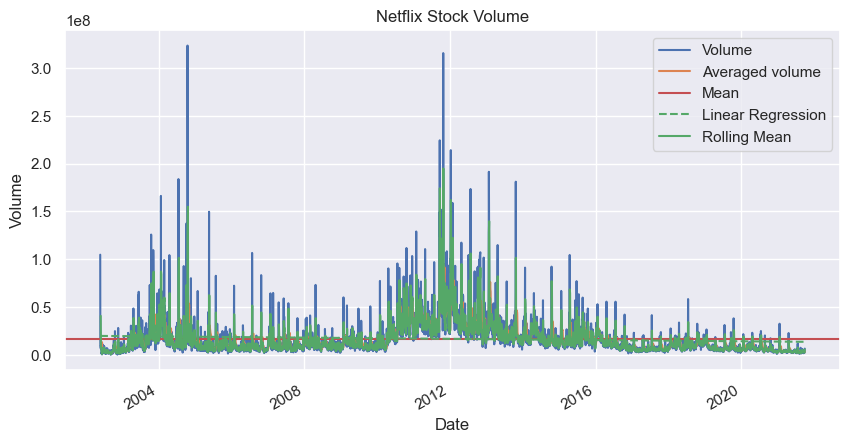

In [15]:

NFLX = pd.read_csv('C:\\Users\\saawa\\Downloads\\STA6857\\NFLX.csv') 

sns.set(rc={'figure.figsize':(10,5)})
NFLX['Date'] = pd.to_datetime(NFLX['Date'])
NFLX = NFLX.set_index('Date')

# plot the volume data and the rolling average of the volume
sns.lineplot(x=NFLX.index, y=NFLX['Volume'], label='Volume')
NFLX['Volume'].rolling(window=12).mean().plot(label='Averaged volume')

# calculate the sample mean and plot as a horizontal line
mean_val = NFLX['Volume'].mean()
plt.axhline(mean_val, color='r', label='Mean')

# calculate and plot the linear regression trend line
x_values = NFLX.index.values.astype('int64') // 10 ** 9 // 86400
z = np.polyfit(x_values, NFLX['Volume'], 1)
p = np.poly1d(z)
plt.plot(NFLX.index.values, p(x_values), "g--", label='Linear Regression')

# add a moving average of three
NFLX['rolling_mean'] = NFLX['Volume'].rolling(window=3).mean()
NFLX.plot(y='rolling_mean', ax=plt.gca(), label='Rolling Mean')


# add labels and legend
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Netflix Stock Volume')
plt.legend()
plt.show()


## Plot the ACF for your time series.
Indicate if the ACF cuts off (and when) or if it trails off.

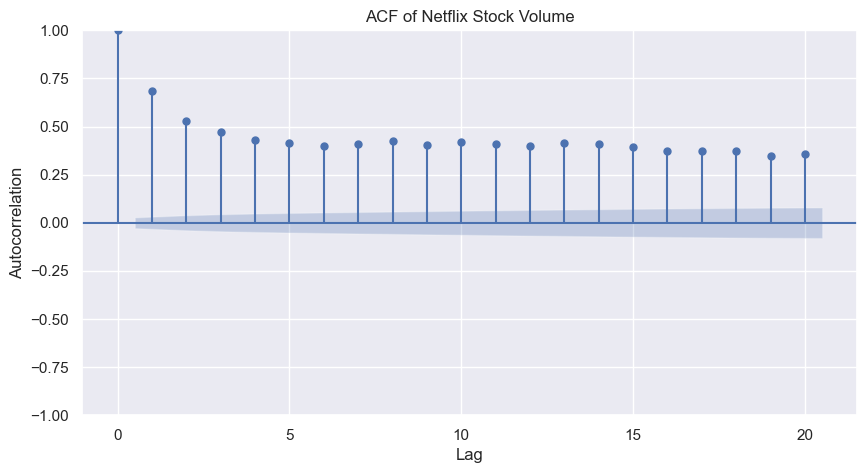

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

# plot the autocorrelation function
plot_acf(NFLX['Volume'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF of Netflix Stock Volume')

plt.show()

## Plot the PACF for your time series.
Indicate if the PACF cuts off (and when) or if it trails off.

C:\Users\saawa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


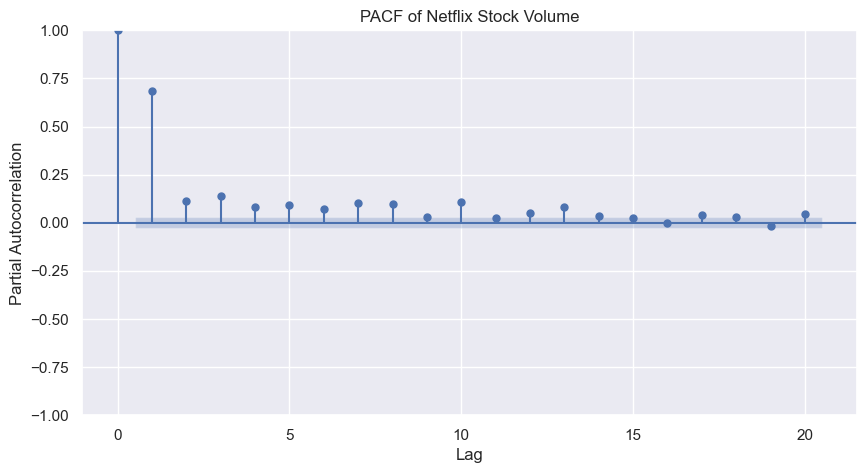

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

# plot the partial autocorrelation function
plot_pacf(NFLX['Volume'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF of Netflix Stock Volume')

plt.show()